样本分布

In [1]:
%cd /Users/yantong/Desktop/NLP\ for\ Risk/Code/

/Users/yantong/Desktop/NLP for Risk/Code


In [2]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

In [3]:

import jieba as jb
import re



In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np

from keras.layers import Dense, Input, Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential


In [5]:
plt.rcParams['font.family'] = ['Arial Unicode MS'] #正常显示中文 
plt.rcParams['font.sans-serif'] = ['KaiTi']#作图的中文
plt.rcParams['font.serif'] = ['KaiTi']#作图的中文
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [56]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth",None)
pd.set_option('display.width',None)

In [7]:
data = pd.read_csv("SY_RISK.csv")

## Obtain Data

In [8]:
data['content_long'] = data.apply(lambda r: len(r['content.1']) > len(r['content']),axis=1)

In [9]:
data[data.content_long == True].shape

(29, 19)

In [10]:
def ff(x):
    if x["content_long"] == True:
        return x["content.1"]
    return x["content"]
 
    pass
data['content_'] = data.apply(lambda r: ff(r),axis=1)


In [11]:
data.head()

,id,record_id,content,create_time,id.1,customer_id,credit_code,register_no,data_id,title,content.1,url,event_time,item_id,item_name,parent_item_name,create_time.1,update_time,content_long,content_
0,1,1,"{""accord"":[""《福州市城市道路建设与管理办法》第二十九条第二项""],""caseName"":""未经批准挖掘城市道路"",""decideDate"":""2019-04-02"",""decideDetail"":[""罚款""],""decideOrgName"":[""福建省福州城管委""],""documentNumber"":""0000277"",""eventTime"":""2019-04-02"",""form"":{""处罚日期"":""2019-04-02"",""处罚事由"":""未经批准挖掘城市道路"",""企业名称"":""中国建筑一局（集团）有限公司"",""作出处罚机构"":""福建省福州城管委"",""处罚名称"":""未经批准挖掘城市道路"",""处罚依据"":""《福州市城市道路建设与管理办法》第二十九条第二项"",""统一社会信用代码"":""91110000101107173B"",""法定代表人姓名"":""罗世威"",""更新时间"":""2019-12-14"",""处罚类别1"":""罚款"",""决定书文号"":""0000277""},""issueDate"":""2019-12-14"",""litigants"":[{""detail"":[{""type"":""罚款""}],""name"":""中国建筑一局（集团）有限公司""}],""reason"":[""未经批准挖掘城市道路""],""title"":""案件名称：未经批准挖掘城市道路""}",2019-12-31 15:20:34,1,3,91110000101107173B,NaN,f2064830627aa9858659378f62740aa3,NaN,案件名称：未经批准挖掘城市道路,NaN,2019-12-14 00:00:00,40,高管变动,新闻事件,2019-12-31 15:20:34,2019-12-31 15:20:34,False,"{""accord"":[""《福州市城市道路建设与管理办法》第二十九条第二项""],""caseName"":""未经批准挖掘城市道路"",""decideDate"":""2019-04-02"",""decideDetail"":[""罚款""],""decideOrgName"":[""福建省福州城管委""],""documentNumber"":""0000277"",""eventTime"":""2019-04-02"",""form"":{""处罚日期"":""2019-04-02"",""处罚事由"":""未经批准挖掘城市道路"",""企业名称"":""中国建筑一局（集团）有限公司"",""作出处罚机构"":""福建省福州城管委"",""处罚名称"":""未经批准挖掘城市道路"",""处罚依据"":""《福州市城市道路建设与管理办法》第二十九条第二项"",""统一社会信用代码"":""91110000101107173B"",""法定代表人姓名"":""罗世威"",""更新时间"":""2019-12-14"",""处罚类别1"":""罚款"",""决定书文号"":""0000277""},""issueDate"":""2019-12-14"",""litigants"":[{""detail"":[{""type"":""罚款""}],""name"":""中国建筑一局（集团）有限公司""}],""reason"":[""未经批准挖掘城市道路""],""title"":""案件名称：未经批准挖掘城市道路""}"
1,81555,81555,本网讯（通讯员 孙静娴）12月13日上午，中建一局房地产公司组织召开第七次中心组学习（扩大）会，第一时间对中建一局第五次党代会精神进行专题学习宣贯。此次会议在公司总部会议室设主会场1个，各下属经营机构共设分会场11个，参会人员涉及公司领导班子成员、总部部门负责人及以上干部、各下属经营机构负责人、全体党员及群众代表近100余人。会议由局党委委员、公司党委书记、董事长樊飞军主持。\n\n会上，传达学习了罗世威同志在中建一局第五次党代会上所作的《坚持党建引领强化战略执行 永葆组织活力 为创建中国建筑旗下最具核心竞争力的世界一流企业不懈奋斗》的党委工作报告、王希强同志在中建一局第五次党代会上所作的《推进“两个责任”落实 坚决做到“两个维护” 忠实履行党章和宪法赋予的职责 为实现中建一局战略目标提供坚强保障》的纪委工作报告，参会人员对两个报告的内容进行了热烈讨论，并结合企业实际进行了交流研讨。\n\n一是以实施“五大聚焦”和“一化三线”战略为主线，加速实现规模发展。深度聚焦国家重点战略地区，聚焦北京、天津、江苏、浙江和上海等战略区域重点城市，并建立研究工作机制，以“政策性住房”产品线为核心，以普通商品住宅产品线为助力，重点突破苏南、南京、北京、天津、南通、宁波等城市。\n\n二是以推进公司化建设和精细化管理为核心，加速提升竞争优势。要眼界向外，不断对标学习标杆房企、中建系统内优势企业的先进思想和举措，推进企业治理体系建设和公司化建设，强化精细化管理，以规范、科学的工作机制推动企业高质量发展。\n\n三是以紧抓投融资管理和降杠杆减负债为抓手，加速推进高质发展。坚持“两金”压降过程监控，全力降低带息负债。建立健全过程监控管理体系，构建覆盖全生命周期的管理体系，及时识别、防控、化解风险问题，建立风险事项清单及销项制度，加强风险防控与应对能力。\n\n四是坚持党的领导，聚焦新时代高质量党建引领高质量发展，夯实成为中建一局价值和效益新担当。必须坚持思想引领，坚定政治站位，将习近平新时代中国特色社会主义思想和党的十九大、十九届四中全会精神贯穿经营发展全过程。深入践行155大党建工作格局，进一步深化党建工作与生产经营一体化；始终锁定“中建一局效益贡献骨干子企业”的战略目标；始终强化战略执行，做到使命必达；始终强化党风廉政建设，营造风清气正政治生态；始终坚持不懈加强领导班子建设和干部...,2020-01-02 11:10:51,81555,20,91110000101715726A,NaN,5df9d8d54e0b810d790cfdd2_16,中建一局房地产公司学习宣贯局第五次党代会精神,"将中建一局党委和纪委的各项工作要求落到实处,为实现公司五年后营业收入300亿,利润总额30亿的目标不懈奋斗!",http://news.jschina.com.cn/qyxw/201912/t20191218_2444769.shtml,2019-12-18 13:44:21,52,亏损盈利,新闻事件,2020-01-02 11:10:51,2020-01-02 11:10:51,False,本网讯（通讯员 孙静娴）12月13日上午，中建一局房地产公司组织召开第七次中心组学习（扩大）会，第一时间对中建一局第五次党代会精神进行专题学习宣贯。此次会议在公司总部会议室设主会场1个，各下属经营机构共设分会场11个，参会人员涉及公司领导班子成员、总部部门负责人及以上干部、各下属经营机构负责人、全体党员及群众代表近100余人。会议由局党委委员、公司党委书记、董事长樊飞军主持。\n\n会上，传达学习了罗世威同志在中建一局第五次党代会上所作的《坚持党建引领强化战略执行 永葆组织活力 为创建中国建筑旗下最具核心竞争力的世界一流企业不懈奋斗》的党委工作报告、王希强同志在中建一局第五次党代会上所作的《推进“两个责任”落实 坚决做到“两个维护” 忠实履行党章和宪法赋予的职责 为实现中建一局战略目标提供坚强保障》的纪委工作报告，参会人员对两个报告的内容进行了热烈讨论，并结合企业实际进行了交流研讨。\n\n一是以实施“五大聚焦”和“一化三线”战略为主线，加速实现规模发展。深度聚焦国家重点战略地区，聚焦北京、天津、江苏、浙江和上海等战略区域重点城市，并建立研究工作机制，以“政策性住房”产品线为核心，以普通商品住宅产品线为助力，重点突破苏南、南京、北京、天津、南通、宁波等城市。\n\n二是以推进公司化建设和精细化管理为核心，加速提升竞争优势。要眼界向外，不断对标学习标杆房企、中建系统内优势企业的先进思想和举措，推进企业治理体系建设和公司化建设，强化精细化管理，以规范、科学的工作机制推动企业高质量发展。\n\n三是以紧抓投融资管理和降杠杆减负债为抓手，加速推进高质发展。坚持“两金”压降过程监控，全力降低带息负债。建立健全过程监控管理体系，构建覆盖全生命周期的管理体系，及时识别、防控、化解风险问题，建立风险事项清单及销项制度，加强风险防控与应对能力。\n\n四是坚持党的领导，聚焦新时代高质量党建引领高质量发展，夯实成为中建一局价值和效益新担当。必须坚持思想引领，坚定政治站位，将习近平新时代中国特色社会主义思想和党的十九大、十九届四中全会精神贯穿经营发展全过程。深入践行155大党建工作格局，进一步深化党建工作与生产经营一体化；始终锁定“中建一局效益贡献骨干子企业”的战略目标

In [12]:
sy_risk = data.drop(['id.1','credit_code','register_no','data_id','url','parent_item_name','create_time.1',
                     'content_long','create_time.1','content.1','content'],axis =1)

In [13]:
sy_risk = sy_risk[sy_risk.title.isnull() == False]

In [14]:
colnames = ['id','record_id','customer_id','item_id',  'item_name',
         'event_time','create_time',   'update_time', 'title','content_']
sy_risk = sy_risk[colnames]

##  Data Preparation 

### Y label

In [16]:
sy_risk.item_name.value_counts()

相关提及    8161
经营业务    1876
成果奖项     944
合作经营     890
重大交易     494
亏损盈利     430
员工情况     348
投资融资     328
产品信息     259
安全事件     172
收购重组     162
涉诉违规     137
股权变动     109
债务抵押     108
停业暂停      69
高管变动      52
新品升级      51
行政处罚      51
合同纠纷      39
劳务纠纷      38
高管负面      37
破产清算      36
信用信誉      28
造假欺诈      22
环境保护      20
产品质量      15
增持减持      11
上市退市      11
侵权抄袭       9
Name: item_name, dtype: int64

In [17]:
# sy_risk[sy_risk.item_name == '侵权抄袭']

In [18]:
# sy_risk[sy_risk.item_name == '增持减持']

In [19]:
# sy_risk[sy_risk.item_name == '上市退市']

In [20]:
# sy_risk[sy_risk.item_name == '产品质量']

In [21]:
# sy_risk[sy_risk.item_name == '环境保护']

In [22]:
# sy_risk.to_csv('sy_risk_2.csv')

In [23]:
def ff(x):
    if x["item_name"] == '相关提及':
        return 0
    return 1
 
    pass
sy_risk['label'] = sy_risk.apply(lambda r: ff(r),axis=1)


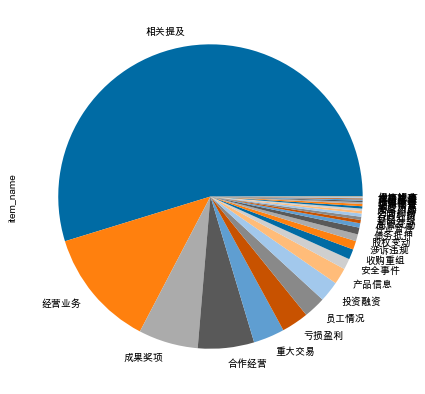

In [24]:
plt.rcParams['font.family'] = ['Arial Unicode MS'] #正常显示中文 
plt.rcParams['font.sans-serif'] = ['KaiTi']#作图的中文
plt.rcParams['font.serif'] = ['KaiTi']#作图的中文
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题


#Adding dark background to the graph
plt.style.use("tableau-colorblind10")

#Plotting a pie chart
plt.figure(figsize=[9,7])
sy_risk['item_name'].value_counts().plot.pie()
plt.show()


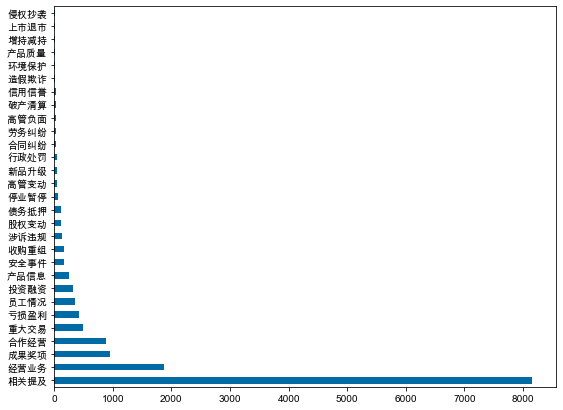

In [25]:
plt.rcParams['font.family'] = ['Arial Unicode MS'] #正常显示中文 
plt.rcParams['font.sans-serif'] = ['KaiTi']#作图的中文
plt.rcParams['font.serif'] = ['KaiTi']#作图的中文
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题


#Adding dark background to the graph
plt.style.use("tableau-colorblind10") #Plotting a bar chart

plt.figure(figsize=[9,7])
sy_risk['item_name'].value_counts().plot.barh()
plt.show()

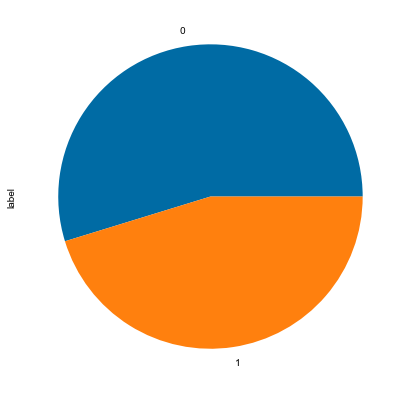

In [26]:
plt.rcParams['font.family'] = ['Arial Unicode MS'] #正常显示中文 
plt.rcParams['font.sans-serif'] = ['KaiTi']#作图的中文
plt.rcParams['font.serif'] = ['KaiTi']#作图的中文
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题


#Adding dark background to the graph
plt.style.use("tableau-colorblind10")

#Plotting a pie chart
plt.figure(figsize=[9,7])
sy_risk['label'].value_counts().plot.pie()
plt.show()


In [27]:
sy_risk['title_content'] = sy_risk['title'].str.cat(sy_risk['content_'])

In [28]:
sy_risk['content_word_count'] = sy_risk.apply( lambda x: len(x['title_content']), axis = 1 )

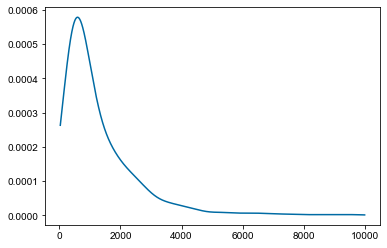

In [29]:
word_count = sy_risk['content_word_count']
density = gaussian_kde(word_count)
xs = np.linspace(word_count.min(),word_count.max(),len(word_count))
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

In [30]:
sy_risk[sy_risk['content_word_count'] < 50].shape

(84, 13)

In [31]:
duplicated_sy_risk = sy_risk[sy_risk.duplicated(subset = ['content_'])== False]

In [32]:
duplicated_sy_risk.shape

(9029, 13)

In [33]:
sy_risk.shape

(14907, 13)

In [34]:
sy_risk[sy_risk.duplicated(subset = ['content_'])].shape

(5878, 13)

有效样本：duplicated_sy_risk

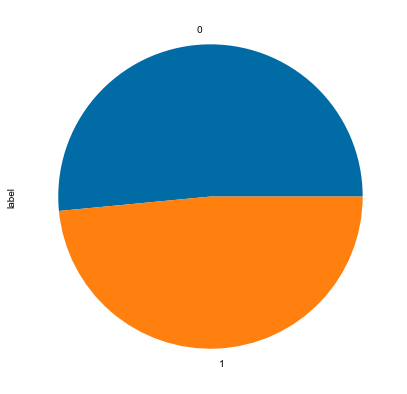

In [35]:
plt.rcParams['font.family'] = ['Arial Unicode MS'] #正常显示中文 
plt.rcParams['font.sans-serif'] = ['KaiTi']#作图的中文
plt.rcParams['font.serif'] = ['KaiTi']#作图的中文
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题


#Adding dark background to the graph
plt.style.use("tableau-colorblind10")

#Plotting a pie chart
plt.figure(figsize=[9,7])
duplicated_sy_risk['label'].value_counts().plot.pie()
plt.show()


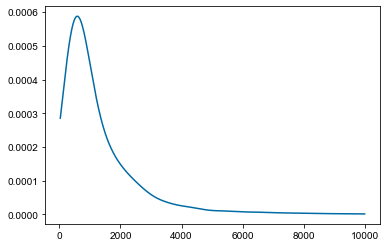

In [36]:
word_count = duplicated_sy_risk['content_word_count']
density = gaussian_kde(word_count)
xs = np.linspace(word_count.min(),word_count.max(),len(word_count))
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

In [37]:
duplicated_sy_risk[duplicated_sy_risk['content_word_count'] > 5000].shape

(236, 13)

**有344有效样本字数大于5000词**

In [38]:
duplicated_sy_risk[duplicated_sy_risk['content_word_count'] > 5000].head()

,id,record_id,customer_id,item_id,item_name,event_time,create_time,update_time,title,content_,label,title_content,content_word_count
17,81571,81571,58,50,经营业务,2019-12-18 05:43:34,2020-01-02 11:10:54,2020-01-02 11:10:54,「活力开发区频道」2019年12月18日 星期三,今天是2019年12月18日，星期三，农历十一月二十三，晴转多云，3-4级西北风，气温-16℃/-6℃，让活力开发区频道伴您开始新的一天！\n\n为深入贯彻党的十九届四中全会精神，辽河镇把夯实基层基础作为固本之策，进一步完善党组织领导下的自治、法治、德治相结合的基层治理体系，打造充满活力、和谐有序的善治乡村。\n\n一是加强党的建设，健全完善基层治理组织保障。辽河镇坚持以提升组织力为重点，把加强基层党组织建设、巩固党的执政基础贯穿基层社会治理体系建设始终，组织实施头雁领航、阵地提升、五事争先、星级创评、四诺一管 “五大专项行动”，充分发挥党组织、党员在社会治理中的示范作用，营造党群携手、共同参与基层治理的良好氛围。\n\n二是坚持法治为纲，夯实基层社会治理法治基础。针对近郊村多、群众诉求多样的实际，辽河镇坚持用法治精神引领、用法治思维谋划、用法治方式破解基层社会治理难题。整合司法、信访、公安、综治等方面力量，推行“四心合一”组建矛盾纠纷多元化解中心，邀请有经验的老同志组建信访案件审查委员会，对重点信访案件把脉问效，做到小事不出村、大事不出镇、矛盾不上交。\n\n三是坚持德治润心，厚植基层社会治理新风正气。切实发挥新时代文明所（站）作用，持续推进农村精神文明建设，巩固农村思想文化阵地，倡导科学文明生活，深化乡风民风家风建设，注重家庭家风家教，广泛开展星级文明户、文明家庭等群众性精神文明创建活动，引导广大农民由“要我文明”向“我要文明”转变，不断提升乡村整体精神风貌，促进基层治理。\n\n四是坚持自治固本，激发基层社会治理群众活力。持续推动“12345”基层自治体系发挥作用，健全完善以基层党组织为领导、村民委员会和村务监督委员会为基础、集体经济组织和农民合作组织为纽带的村级组织体系，实施村级事务“阳光工程”，不断优化完善“532”工作法，依法保障基层群众的知情权、参与权、表达权及监督权。借助开发区“云智慧党建+”平台，推行“一人带十户”红色网格化管理，每个网格由一名党员负责，整合人、地、事、物、情多种因素，寓管理于服务，构建村民自治工作新格局，畅通村民自治渠道，为构建和谐社会、实现乡村振兴奠定坚实基础。（闫宝春）\n\n日前，通辽经济技术开发区与美歌联合能源控股有限公司、大连金玛硼业科技集团股份有限公司就“含硼特种材料产业园”项目签订战略合作协议。三方携手共同打...,1,「活力开发区频道」2019年12月18日 星期三今天是2019年12月18日，星期三，农历十一月二十三，晴转多云，3-4级西北风，气温-16℃/-6℃，让活力开发区频道伴您开始新的一天！\n\n为深入贯彻党的十九届四中全会精神，辽河镇把夯实基层基础作为固本之策，进一步完善党组织领导下的自治、法治、德治相结合的基层治理体系，打造充满活力、和谐有序的善治乡村。\n\n一是加强党的建设，健全完善基层治理组织保障。辽河镇坚持以提升组织力为重点，把加强基层党组织建设、巩固党的执政基础贯穿基层社会治理体系建设始终，组织实施头雁领航、阵地提升、五事争先、星级创评、四诺一管 “五大专项行动”，充分发挥党组织、党员在社会治理中的示范作用，营造党群携手、共同参与基层治理的良好氛围。\n\n二是坚持法治为纲，夯实基层社会治理法治基础。针对近郊村多、群众诉求多样的实际，辽河镇坚持用法治精神引领、用法治思维谋划、用法治方式破解基层社会治理难题。整合司法、信访、公安、综治等方面力量，推行“四心合一”组建矛盾纠纷多元化解中心，邀请有经验的老同志组建信访案件审查委员会，对重点信访案件把脉问效，做到小事不出村、大事不出镇、矛盾不上交。\n\n三是坚持德治润心，厚植基层社会治理新风正气。切实发挥新时代文明所（站）作用，持续推进农村精神文明建设，巩固农村思想文化阵地，倡导科学文明生活，深化乡风民风家风建设，注重家庭家风家教，广泛开展星级文明户、文明家庭等群众性精神文明创建活动，引导广大农民由“要我文明”向“我要文明”转变，不断提升乡村整体精神风貌，促进基层治理。\n\n四是坚持自治固本，激发基层社会治理群众活力。持续推动“12345”基层自治体系发挥作用，健全完善以基层党组织为领导、村民委员会和村务监督委员会为基础、集体经济组织和农民合作组织为纽带的村级组织体系，实施村级事务“阳光工程”，不断优化完善“532”工作法，依法保障基层群众的知情权、参与权、表达权及监督权。借助开发区“云智慧党建+”平台，推行“一人带十户”红色网格化管理，每个网格由一名党员负责，整合人、地、事、物、情多种因素，寓管理于服务，构建村民自治工作新格局，畅通村民自治渠道，为构建和谐社会、实现乡村振兴奠定坚实基础。（闫宝春）\n\n日前，通辽经济技术开发区与美歌联合能源控股有限公司、大连金玛硼业科技集团股份有限公司就“含硼特种...,9781
18,81572,81572,58,50,经营业务,2019-12-17 05:30:00,2020-01-02 11:10:55,2020-01-02 11:10:55,【开发区早间新闻快报】2019年12月17日星期二,今天是2019年12月17日，星期二，农历十一月二十二，晴转多云，3-4级西北风，气温-17℃/-6℃，开始新的一天！学 习 时 间社会治理是国家治理的重要方面。必须加强和创新社会治理，完善党委领导、政府负责、民主协商、社会协同、公众参与、法治保障、科技支撑的社会治理体系，建设人人有责、人人尽责、人人享有的社会治理共同体，确保人民安居乐业、社会安定有序，建设更高水平的平安中国。——《中共中央关于坚持和完善中国特色社会主义制度、推进国家治理体系和治理能力现代化若干重大问题的决定》着力推进社会治理现代化党的十九届四中全会深刻总结了我国国家制度和治理体系具有13个方面的显著优势，这些显著优势是我们坚定“四个自信”的基本依据。全会提出坚持和完善13个方面的制度体系，强调坚持和完善中国特色社会主义制度，推进国家治理体系和治理能力现代化是全党一项重大战略任务。结合开发区社会治理实际，谈几点体会。一是构建社会治理新格局。完善党委领导、政府负责、民主协商、社会协同、公民参与、法治保障、科技支撑的社会治理体系。形成在党的领导下，各方充分发挥积极性的共建共治共享的社会治理新格局，实现各种治理力量各司其职、各尽其力。二是建立社会治理新机制。完善正确处理新形势下人民内部矛盾有效机制、社会治安防控体系，健全公共安全体制机制，优化矛盾化解工作流程，做到及时发现、快速反应、高效处置，确保矛盾纠纷化解在基层、化解在事发地。要健全组织保障机制，构建上下衔接顺畅、职责分工明确、部门协作密切的组织架构，保障社会治理扎实有效推进。三是搭建社会治理新载体。以建设人人有责、人人尽责、人人享有的社会治理共同体为目标，创新社会治理组织形式、工作方式，更好地整合社会治理力量，提升治理效能。推行“四心合一”模式，实现矛盾调处、法律服务、案件受理、治安防控有机结合，共同发力，提升工作实效。建立“开门纳谏”长效机制，及时搜集群众诉求，把解决群众反映强烈的突出问题作为社会治理的重要着力点，组建基层社会治理联合体，集聚区域治理力量，发挥群众主体作用，强化基层治理基础。（田红军）重点关注◆习近平：推动形成优势互补高质量发展的区域经济布局>>>详情：习近平：推动形成优势互补高质量发展的区域经济布局◆李克强：以法治推进更高水平对外开放>>>详情：李克强：以法治推进更高水平对外开放◆关注｜区块链在国家治理与公共事务中的现实应...,1,【开发区早间新闻快报】2019年12月17日星期二今天是2019年12月17日，星期二，农历十一月二十二，晴转多云，3-4级西北风，气温-17℃/-6℃，开始新的一天！学 习 时 间社会治理是国家治理的重要方面。必须加强和创新社会治理，完善党委领导、政府负责、民主协商、社会协同、公众参与、法治保障、科技支撑的社会治理体系，建设人人有责、人人尽责、人人享有的社会治理共同体，确保人民安居乐业、社会安定有序，建设更高水平的平安中国。——《中共中央关于坚持和完善中国特色社会主义制度、推进国家治理体系和治理能力现代化若干重大问题的决定》着力推进社会治理现代化党的十九届四中全会深刻总结了我国国家制度和治理体系具有13个方面的显著优势，这些显著优势是我们坚定“四个自信”的基本依据。全会提出坚持和完善13个方面的制度体系，强调坚持和完善中国特色社会主义制度，推进国家治理体系和治理能力现代化是全党一项重大战略任务。结合开发区社会治理实际，谈几点体会。一是构建社会治理新格局。完善党委领导、政府负责、民主协商、社会协同、公民参与、法治保障、科技支撑的社会治理体系。形成在党的领导下，各方充分发挥积极性的共建共治共享的社会治理新格局，实现各种治理力量各司其职、各尽其力。二是建立社会治理新机制。完善正确处理新形势下人民内部矛盾有效机制、社会治安防控体系，健全公共安全体制机制，优化矛盾化解工作流程，做到及时发现、快速反应、高效处置，确保矛盾纠纷化解在基层、化解在事发地。要健全组织

http://baijiahao.baidu.com/s?id=1653204833050706810&wfr=spider&for=pc

In [39]:
#定义删除除字母,数字，汉字以外的所有符号的函数
def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('',line)
    return line
 
# def stopwordslist(filepath):  
#     stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
#     return stopwords  
 
# #加载停用词
# stopwords = stopwordslist("./data/chineseStopWords.txt")

In [40]:
duplicated_sy_risk['cleaned_word'] = duplicated_sy_risk['title_content'].apply(remove_punctuation)

/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
# 分词
duplicated_sy_risk['cut_word'] = duplicated_sy_risk['cleaned_word'].apply(lambda x: " ".join([w for w in list(jb.cut(x))]))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/_t/sz397vz14zvbvb__stdk6pt00000gn/T/jieba.cache
Loading model cost 0.625 seconds.
Prefix dict has been built successfully.
/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
duplicated_sy_risk.head()

,id,record_id,customer_id,item_id,item_name,event_time,create_time,update_time,title,content_,label,title_content,content_word_count,cleaned_word,cut_word
1,81555,81555,20,52,亏损盈利,2019-12-18 13:44:21,2020-01-02 11:10:51,2020-01-02 11:10:51,中建一局房地产公司学习宣贯局第五次党代会精神,本网讯（通讯员 孙静娴）12月13日上午，中建一局房地产公司组织召开第七次中心组学习（扩大）会，第一时间对中建一局第五次党代会精神进行专题学习宣贯。此次会议在公司总部会议室设主会场1个，各下属经营机构共设分会场11个，参会人员涉及公司领导班子成员、总部部门负责人及以上干部、各下属经营机构负责人、全体党员及群众代表近100余人。会议由局党委委员、公司党委书记、董事长樊飞军主持。\n\n会上，传达学习了罗世威同志在中建一局第五次党代会上所作的《坚持党建引领强化战略执行 永葆组织活力 为创建中国建筑旗下最具核心竞争力的世界一流企业不懈奋斗》的党委工作报告、王希强同志在中建一局第五次党代会上所作的《推进“两个责任”落实 坚决做到“两个维护” 忠实履行党章和宪法赋予的职责 为实现中建一局战略目标提供坚强保障》的纪委工作报告，参会人员对两个报告的内容进行了热烈讨论，并结合企业实际进行了交流研讨。\n\n一是以实施“五大聚焦”和“一化三线”战略为主线，加速实现规模发展。深度聚焦国家重点战略地区，聚焦北京、天津、江苏、浙江和上海等战略区域重点城市，并建立研究工作机制，以“政策性住房”产品线为核心，以普通商品住宅产品线为助力，重点突破苏南、南京、北京、天津、南通、宁波等城市。\n\n二是以推进公司化建设和精细化管理为核心，加速提升竞争优势。要眼界向外，不断对标学习标杆房企、中建系统内优势企业的先进思想和举措，推进企业治理体系建设和公司化建设，强化精细化管理，以规范、科学的工作机制推动企业高质量发展。\n\n三是以紧抓投融资管理和降杠杆减负债为抓手，加速推进高质发展。坚持“两金”压降过程监控，全力降低带息负债。建立健全过程监控管理体系，构建覆盖全生命周期的管理体系，及时识别、防控、化解风险问题，建立风险事项清单及销项制度，加强风险防控与应对能力。\n\n四是坚持党的领导，聚焦新时代高质量党建引领高质量发展，夯实成为中建一局价值和效益新担当。必须坚持思想引领，坚定政治站位，将习近平新时代中国特色社会主义思想和党的十九大、十九届四中全会精神贯穿经营发展全过程。深入践行155大党建工作格局，进一步深化党建工作与生产经营一体化；始终锁定“中建一局效益贡献骨干子企业”的战略目标；始终强化战略执行，做到使命必达；始终强化党风廉政建设，营造风清气正政治生态；始终坚持不懈加强领导班子建设和干部队伍建设，夯实改革发展的组织保障。\n\n五是要继续组织全体人员深入学习贯彻中建一局第五次党代会会议精神。将中建一局党委和纪委的各项工作要求落到实处，为实现公司五年后营业收入300亿，利润总额30亿的目标不懈奋斗！,1,中建一局房地产公司学习宣贯局第五次党代会精神本网讯（通讯员 孙静娴）12月13日上午，中建一局房地产公司组织召开第七次中心组学习（扩大）会，第一时间对中建一局第五次党代会精神进行专题学习宣贯。此次会议在公司总部会议室设主会场1个，各下属经营机构共设分会场11个，参会人员涉及公司领导班子成员、总部部门负责人及以上干部、各下属经营机构负责人、全体党员及群众代表近100余人。会议由局党委委员、公司党委书记、董事长樊飞军主持。\n\n会上，传达学习了罗世威同志在中建一局第五次党代会上所作的《坚持党建引领强化战略执行 永葆组织活力 为创建中国建筑旗下最具核心竞争力的世界一流企业不懈奋斗》的党委工作报告、王希强同志在中建一局第五次党代会上所作的《推进“两个责任”落实 坚决做到“两个维护” 忠实履行党章和宪法赋予的职责 为实现中建一局战略目标提供坚强保障》的纪委工作报告，参会人员对两个报告的内容进行了热烈讨论，并结合企业实际进行了交流研讨。\n\n一是以实施“五大聚焦”和“一化三线”战略为主线，加速实现规模发展。深度聚焦国家重点战略地区，聚焦北京、天津、江苏、浙江和上海等战略区域重点城市，并建立研究工作机制，以“政策性住房”产品线为核心，以普通商品住宅产品线为助力，重点突破苏南、南京、北京、天津、南通、宁波等城市。\n\n二是以推进公司化建设和精细化管理为核心，加速提升竞争优势。要眼界向外，不断对标学习标杆房企、中建系统内优势企业的先进思想和举措，推进企业治理体系建设和公司化建设，强化精细化管理，以规范、科学的工作机制推动企业高质量发展。\n\n三是以紧抓投融资管理和降杠杆减负债为抓手，加速推进高质发展。坚持“两金”压降过程监控，全力降低带息负债。建立健全过程监控管理体系，构建覆盖全生命周期的管理体系，及时识别、防控、化解风险问题，建立风险事项清单及销项制度，加强风险防控与应对能力。\n\n四是坚持党的领导，聚焦新时代高质量党建引领高质量发展，夯实成为中建一局价值和效益新担当。必须坚持思想引领，坚定政治站位，将习近平新时代中国特色社会主义思想和党的十九大、十九届四中全会精神贯穿经营发展全过程。深入践行155大党建工作格局，进一步深化党建工作与生产经营一体化；始终锁定“中建一局效益贡献骨干子企业”的战略目标；始终强化战略执行，做到使命必达；始终强化党风廉政建设，营造风清气正政治生态；始终坚持不懈加强领导班子建设和干部队伍建设，夯实改革发展的组织保障。\n\n五是要继续组织全体人员深入学习贯彻中建一局第五次党代会会议精神。将中建一局党委和纪委的各项工作要求落到实处，为实现公司五年后营业收入300亿，利润总额30亿的目标不懈奋斗！,1113,中建一局房地产公司学习宣贯局第五次党代会精神本网讯通讯员孙静娴12月13日上午中建一局房地产公司组织召开第七次中心组学习扩大会第一时间对中建一局第五次党代会精神进行专题学习宣贯此次会议在公司总部会议室设主会场1个各下属经营机构共设分会场11个参会人员涉及公司领导班子成员总部部门负责人及以上干部各下属经营机构负责人全体党员及群众代表近100余人会议由局党委委员公司党委书记董事长樊飞军主持会上传达学习了罗世威同志在中建一局第五次党代会上所作的坚持党建引领强化战略执行永葆组织活力为创建中国建筑旗下最具核心竞争力的世界一流企业不懈奋斗的党委工作报告王希强同志在中建一局第五次党代会上所作的推进两个责任落实坚决做到两个维护忠实履行党章和宪法赋予的职责为实现中建一局战略目标提供坚强保障的纪委工作报告参会人员对两个报告的内容进行了热烈讨论并结合企业实际进行了交流研讨一是以实施五大聚焦和一化三线战略为主线加速实现规模发展深度聚焦国家重点战略地区聚焦北京天津江苏浙江和上海等战略区域重点城市并建立研究工作机制以政策性住房产品线为核心以普通商品住宅产品线为助力重点突破苏南南京北京天津南通宁波等城市二是以推进公司化建设和精细化管理为核心加速提升竞争优势要眼界向外不断对标学习标杆房企中建系统内优势企业的先进思想和举措推进企业治理体系建设和公司化建设强化精细化管理以规范科学的工作机制推动企业高质量发展三是以紧抓投融资管理和降杠杆减负债为抓手加速推进高质发展坚持两金压降过程监控全力降低带息负债建立健全过程监控管理体系构建覆盖全生命周期的管理体系及时识别防控化解风险问题建立风险事项清单及销项制度加强风险防控与应对能力四是坚持党的领导聚焦新时代高质量党建引领高质量发展夯实成为中建一局价值和效益新担当必须坚持思想引领坚定政治站位将习近平新时代中国特色社会主义思想和党的十九大十九届四中全会精神贯穿经营发展全过程深入践行155大党建工作格局进一步深化党建工作与生产经营一体化始终锁定中建一局效益贡献骨干子企业的战略目标始终强化战略执行做到使命必达始终强化党风廉政建设营造风清气正政治生态始终坚持不懈加强领导班子建设和干部队伍建设夯实改革发展的组织保障五是要继续组织全体人员深入学习贯彻中建一局第五次党代会会议精神将中建一局党委和纪委的各项工作要求落到实处为实现公司五年后营业收入300亿利润总额30亿的目标不懈奋斗,中建 一局 房地产 公司 学习 宣贯局 第五次 党代会 精神 本 网讯 通讯员 孙静 娴 12 月 13 日 上午 中建 一局 房地产 公司 组织 召开 第七次 中心组 学习 扩大会 第一 时间 对 中建 一局 第五次 党代会 精神 进行 专题学习 宣贯 此次 会议 在 公司总部 会议室 设 主会场 1 个 各 下属 经营 机构 共设 分会场 11 个 参会 人员 涉及 公司 领导班子 成员 总部 部门 负责人 及 以上 干部 各 下属 经营 机构 负责人 全体 党员 及 群众 代表 近 100 余人 会议 由局 党委委员 公司 党委书记 董事长 樊飞军 主持 会上 传达 学习 了 罗世威 同志 在 中建 一局 第五次 党代会 上 所作 的 坚持 党建 引领 强化 战略 执行 永葆 组织 活力 为 创建 中国 建筑 旗下 最具 核心 竞争力 的 世界 一流 企业 不懈 奋斗 的 党委 工作 报告 王希强 同志 在 中建 一局 第五次 党代会 上 所作 的 推进 两个 责任 落实 坚决 做到 两个 维护 忠实 履行 党章 和 宪法 赋予 的 职责 为 实现 中建 一局 战略目标 提供 

In [45]:
duplicated_sy_risk.to_csv('duplicate_.csv')

In [49]:
duplicated_sy_risk.item_name.value_counts()

相关提及    4651
经营业务    1253
成果奖项     630
合作经营     514
亏损盈利     410
重大交易     257
投资融资     177
员工情况     177
产品信息     138
安全事件     112
收购重组     111
债务抵押     102
涉诉违规      90
股权变动      70
停业暂停      50
行政处罚      41
高管变动      39
破产清算      35
新品升级      26
高管负面      24
信用信誉      23
造假欺诈      20
合同纠纷      19
产品质量      14
劳务纠纷      13
环境保护      12
增持减持      11
侵权抄袭       6
上市退市       4
Name: item_name, dtype: int64

In [51]:
duplicated_sy_risk[duplicated_sy_risk.item_name == '经营业务'].to_csv("经营业务.csv")

In [73]:
data_label = duplicated_sy_risk.drop(['id','customer_id','item_id', 'event_time','create_time', 'update_time',
                        'label','cleaned_word','cut_word','content_word_count','title_content'],axis = 1)

In [75]:
# data_label['pre-label'] = 0

In [76]:
data_label.head()

,record_id,item_name,title,content_,pre-label
1,81555,亏损盈利,中建一局房地产公司学习宣贯局第五次党代会精神,本网讯（通讯员 孙静娴）12月13日上午，中建一局房地产公司组织召开第七次中心组学习（扩大）会，第一时间对中建一局第五次党代会精神进行专题学习宣贯。此次会议在公司总部会议室设主会场1个，各下属经营机构共设分会场11个，参会人员涉及公司领导班子成员、总部部门负责人及以上干部、各下属经营机构负责人、全体党员及群众代表近100余人。会议由局党委委员、公司党委书记、董事长樊飞军主持。\n\n会上，传达学习了罗世威同志在中建一局第五次党代会上所作的《坚持党建引领强化战略执行 永葆组织活力 为创建中国建筑旗下最具核心竞争力的世界一流企业不懈奋斗》的党委工作报告、王希强同志在中建一局第五次党代会上所作的《推进“两个责任”落实 坚决做到“两个维护” 忠实履行党章和宪法赋予的职责 为实现中建一局战略目标提供坚强保障》的纪委工作报告，参会人员对两个报告的内容进行了热烈讨论，并结合企业实际进行了交流研讨。\n\n一是以实施“五大聚焦”和“一化三线”战略为主线，加速实现规模发展。深度聚焦国家重点战略地区，聚焦北京、天津、江苏、浙江和上海等战略区域重点城市，并建立研究工作机制，以“政策性住房”产品线为核心，以普通商品住宅产品线为助力，重点突破苏南、南京、北京、天津、南通、宁波等城市。\n\n二是以推进公司化建设和精细化管理为核心，加速提升竞争优势。要眼界向外，不断对标学习标杆房企、中建系统内优势企业的先进思想和举措，推进企业治理体系建设和公司化建设，强化精细化管理，以规范、科学的工作机制推动企业高质量发展。\n\n三是以紧抓投融资管理和降杠杆减负债为抓手，加速推进高质发展。坚持“两金”压降过程监控，全力降低带息负债。建立健全过程监控管理体系，构建覆盖全生命周期的管理体系，及时识别、防控、化解风险问题，建立风险事项清单及销项制度，加强风险防控与应对能力。\n\n四是坚持党的领导，聚焦新时代高质量党建引领高质量发展，夯实成为中建一局价值和效益新担当。必须坚持思想引领，坚定政治站位，将习近平新时代中国特色社会主义思想和党的十九大、十九届四中全会精神贯穿经营发展全过程。深入践行155大党建工作格局，进一步深化党建工作与生产经营一体化；始终锁定“中建一局效益贡献骨干子企业”的战略目标；始终强化战略执行，做到使命必达；始终强化党风廉政建设，营造风清气正政治生态；始终坚持不懈加强领导班子建设和干部队伍建设，夯实改革发展的组织保障。\n\n五是要继续组织全体人员深入学习贯彻中建一局第五次党代会会议精神。将中建一局党委和纪委的各项工作要求落到实处，为实现公司五年后营业收入300亿，利润总额30亿的目标不懈奋斗！,0
2,81556,亏损盈利,三项制度改革让“能者上、平者让、庸者下”,原标题：三项制度改革让“能者上、平者让、庸者下”\n\n11月11日，中建一局二公司生产组织中心主任公开竞聘面试正在进行，经过前期的资料审核、岗位资格审查和管理测评，共有3名竞聘人员进入最终的结构化面试环节。\n\n孟繁健是参加本次竞聘的人员之一，而这并不是他第一次参加公司的市场化公开竞聘。3年前，孟繁健通过竞聘成为公司某项目的总监，3年后，尝到竞聘“甜头”的孟繁健决定挑战新岗位、迎接新任务。\n\n随着改革的深入推进，中建一局二公司在市场化经营机制改革方面不断强化升级，近两年完成了公司总部部门副职以上的全员公开竞聘上岗，为进一步实施市场化选聘和契约化管理奠定了基础。\n\n2018年，中建一局二公司入选国企改革“双百行动”企业，成为中建集团旗下入选“双百企业”的两家单位之一。近两年来，中建一局二公司按照“完善治理、强化激励、突出主业、提高效率”的方针，稳妥推进股权多元化和混合所有制改革、完善市场化经营机制、健全激励约束机制，并取得阶段性成果。\n\n随着企业整体规模的快速扩张，转型升级战略的不断深入，中建一局二公司人均创效水平不高，“人员短缺”与“人员冗余”同时存在；基础设施、海外以及投融资等转型板块高端人才引进渠道略为单一，对企业转型升级支撑力度不够；市场化程度不高，激励方式相对单一，差异化和业绩导向不够明确等问题逐渐显现。\n\n为此，中建一局二公司以深化人事、劳动、分配三项制度改革为抓手，推行与市场化经营机制相匹配的选人用人机制、用工分配体系改革，实现“干部能上能下，员工能进能出，薪酬能增能减”，让三项制度改革成为企业改革的助推器。\n\n为激发管理团队活力，中建一局二公司建立标准明确、程序规范、结果公平的选人用人工作机制，逐步做到“能者上、平者让、庸者下”，不断提升领导人员五位一体能力素养。同时，坚持业绩与能力导向，通过定期开展薪酬盘点、三维六指模型人力资源价值指数的对标晾晒，差异化设计薪酬标准，让企业的资源投入更精准。\n\n经过近两年的探索和实践，改革对企业发展的促进作用日益凸显。预计2019年，中建一局二公司合同额将达320亿元、营业收入达125亿元，企业的竞争力、创新力、控制力、影响力、抗风险能力不断增强，改革红利持续释放。\n\n“希望通过中建一局二公司‘双百行动’这个点上的示范突破，探索形成可复制、可推广的改革经验，带动全局的改革向纵深推进，为全面深化国有企业改革提供有效的借鉴。”中建一局党委书记、董事长罗世威说。,0
3,81557,停业暂停,荆门市大气污染防治百日攻坚专班全面检查大气污染问题,开展此次检查，旨在持续做好重污染橙色预警期间的应急管控及省生态环境厅定点帮扶暨驻点执法第六工作组交办问题的整改工作。当日，出动了11个现场组、近80人次，先后检查建筑工地41个、企业13家、餐饮店2家、机动车179辆，共发现问题20个，其中建筑工地14个、企业2个、餐饮1家、机动车3辆。\n\n根据检查结果，建筑工地存在的问题主要是现场砂石裸露、渣土未覆盖、清洗车池设置不规范等。如中建一局施工工地在进行土方作业，检查组现场责令停工，要求覆盖裸土。汉阳市政挖机在施工，检查组现场责令停工。在掇刀地税路，检查组发现有大型机械作业，责令施工方停工。在荆门高新区·掇刀区精忠大道金福源院内，有两家木材加工厂，均存在未办理环保相关手续、木材切割过程中产生木屑未进行收集处理的问题。,0
4,81558,经营业务,郑州六家工地劳动用工标准受到通报表彰,原标题：六家工地劳动用工标准受到通报表彰记者29日从郑州城乡建设局了解到，今年第四季度，有6个建设工程项目被评为建设工程劳动用工标准化工地，因此受到郑州城建局的通报表彰。6个建设工程项目包括：宏江金贸\n\n记者29日从郑州城乡建设局了解到，今年第四季度，有6个建设工程项目被评为建设工程劳动用工标准化工地，因此受到郑州城建局的通报表彰。\n\n6个建设工程项目包括：宏江金贸中心[河南省对外建设有限公司承建]，新田印象商业中心[中国建筑一局（集团）有限公司承建]，郑州轨道交通6号线市政配套工程土建施工03标段[中国建筑一局（集团）有限公司承建]，中原区·郑州中原新区庙王安置区西地块一标段[河南六建建筑集团有限公司承建]，中原区·郑州中原新区马庄安置区东地块二标段[郑州一建集团有限公司承建]，荥阳市·瀚宇天悦湾2号院一期[河南领域建设工程有限公司承建]。,0
5,81559,经营业务,【重磅】斥资3亿多!高72米!巢湖这一大型门急诊综合楼破土动工.,合肥八院始建于1952年，俗称三康医院，已走过67年的辉煌历史，是一所集医疗、护理、保健、教学、科研为一体的综合性国家二级甲等医院。近年来，医院的办院规模逐步扩大，服务水平逐步提高，贏得了社会各界普遍赞誉。\n\n随着巢湖市人口的增长和社会经济的发展，合肥市八院在硬件设施上已跟不上发展的步伐，社会和群众对医疗的需求越来越大，要求越来越高，兴建综合多功能的门急诊综合大楼，改善医院就医环境，是医院发展的必然要求。\n\n为改善合肥市八院医疗环境、设施，合肥市委市政府拨款3.36亿元用于新建地下2层、地上16层，总建筑面积41540平方米的现代化门急诊综合大楼。工程竣工后，将大大改善合肥市八院医疗卫生环境，促进巢湖市卫生事业的发展。\n\n合肥市八院新的门急诊综合楼计划建设工期720天，整个项目由中建一局负责建设，预计在2021年底竣工验收并投入使用。 新大楼完工后，该院床位总数将达到1000张。\n\n今天，合肥市八院还与中国红十字会合作，邀请中国科技大学附属第一医院、安徽医科大学附属医院知名专家举办“医路相伴”——专家进基层大型公益义诊和授牌仪式。\n\n今天，合肥市八院新门急诊综合楼项目正式开工，这是该院建设发展史上的重要里程碑，是跨越发展、创建三甲医院的崭新突破口，也是提高医院整体服务能力，增强综合实力的关键着力点，建成后将大大改善巢湖老百姓的就医环境。,0


In [86]:
keyword = pd.read_csv('关键词_企业.csv')

In [89]:
keyword_list = list(keyword['退市'])

In [94]:
lst = [1,2,3,4]
lst_2 = [1,2]
lst_3 = [x for x in lst if x not in lst_2]

In [95]:
lst.remove(lst_2)

ValueError: list.remove(x): x not in list

In [98]:
lst_3 = [x for x in lst if x not in lst_2]

In [97]:
l3

[3, 4]

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
tfidf = TfidfVectorizer(norm='l2', ngram_range=(1, 2))
features = tfidf.fit_transform(duplicated_sy_risk.cut_word)
labels = duplicated_sy_risk.label
print(features.shape)
print('-----------------------------')
print(features)
print(labels)

KeyboardInterrupt: 

In [ ]:
def myPredict(sec):
    format_sec=" ".join([w for w in list(jb.cut(remove_punctuation(sec)))])
    prediction =clf.predict(count_vect.transform([format_sec]))
    print(num_to_label[prediction[0]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
 
from sklearn.model_selection import cross_val_score


In [ ]:

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [46]:
MAX_SEQUENCE_LENGTH = 10000 # 每条新闻最大长度
EMBEDDING_DIM = 200 # 词向量空间维度
VALIDATION_SPLIT = 0.16 # 验证集比例
TEST_SPLIT = 0.2 # 测试集比例

In [47]:
all_texts = duplicated_sy_risk['title_content']
all_labels = duplicated_sy_risk['label']
data = all_texts
labels = all_labels

In [48]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_texts)
sequences = tokenizer.texts_to_sequences(all_texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(all_labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 165064 unique tokens.
Shape of data tensor: (9029, 10000)
Shape of label tensor: (9029, 2)


In [49]:
p1 = int(len(data)*(1-VALIDATION_SPLIT-TEST_SPLIT))
p2 = int(len(data)*(1-TEST_SPLIT))
x_train = data[:p1]
y_train = labels[:p1]
x_val = data[p1:p2]
y_val = labels[p1:p2]
x_test = data[p2:]
y_test = labels[p2:]
print('train docs: '+ str(len(x_train)))
print('val docs: '+ str(len(x_val)))
print('test docs: '+ str(len(x_test)))

train docs: 5778
val docs: 1445
test docs: 1806


### 搭建模型

然后就是搭建模型，首先是一个将文本处理成向量的 embedding 层，这样每个新闻文档被处理成一个 100 x 200 的二维向量，100 是每条新闻的固定长度，每一行的长度为 200 的行向量代表这个单词在空间中的词向量。下面通过 1 层卷积层与池化层来缩小向量长度，再加一层 Flatten 层将 2 维向量压缩到 1 维，最后通过两层 Dense（全连接层）将向量长度收缩到 12 上，对应新闻分类的 12 个类（其实只有 11 个类，标签 0 没有用到）。搭完收工，最后，训练模型，测试模型。


In [50]:
model = Sequential()
model.add(Embedding(len(word_index) + 1, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(Dropout(0.2))
model.add(Conv1D(250, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(EMBEDDING_DIM, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10000, 200)        33013000  
_________________________________________________________________
dropout (Dropout)            (None, 10000, 200)        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 9998, 250)         150250    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3332, 250)         0         
_________________________________________________________________
flatten (Flatten)            (None, 833000)            0         
_________________________________________________________________
dense (Dense)                (None, 200)               166600200 
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4

In [51]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [52]:
# happy learning
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=2, batch_size=128)

Epoch 1/2
46/46 [==============================] - 369s 8s/step - loss: 7.1312 - acc: 0.5363 - val_loss: 0.6686 - val_acc: 0.6997
Epoch 2/2
46/46 [==============================] - 373s 8s/step - loss: 0.6766 - acc: 0.6317 - val_loss: 0.6352 - val_acc: 0.6637


In [55]:
model.evaluate(x_test, y_test)

57/57 [==============================] - 24s 420ms/step - loss: 0.7437 - acc: 0.4945


[0.7436631321907043, 0.49446290731430054]

array([[     0,      0,      0, ..., 132123, 132124, 132125],
       [     0,      0,      0, ...,      5,    142,      1],
       [     0,      0,      0, ..., 132162, 132163, 132164],
       ...,
       [     0,      0,      0, ..., 165037, 165038, 165039],
       [     0,      0,      0, ..., 165042, 165043, 165044],
       [     0,      0,      0, ..., 165062, 165063, 165064]], dtype=int32)

### Word2Vec + CNN

In [58]:
VECTOR_DIR = 'baike.vectors.bin' # 词向量模型文件

from keras.utils import plot_model
from keras.layers import Embedding
import gensim

w2v_model = gensim.models.KeyedVectors.load_word2vec_format(VECTOR_DIR, binary=True)
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items(): 
    if unicode(word) in w2v_model:
        embedding_matrix[i] = np.asarray(w2v_model[unicode(word)],
                                         dtype='float32')
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

NameError: name 'unicode' is not defined

In [ ]:
from keras.layers import Dense, Input, Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential

model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(Conv1D(250, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(EMBEDDING_DIM, activation='relu'))
model.add(Dense(labels.shape[1], activation='softmax'))
model.summary()
#plot_model(model, to_file='model.png',show_shapes=True)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=2, batch_size=128)
model.save('word_vector_cnn.h5')
print model.evaluate(x_test, y_test)

### Word2Vec + LSTM

**不使用预训练的 word2vec 模型的 LSTM**

特征提取以及 embedding 的过程跟 CNN 的实验一致。接下来的 LSTM 层的功能在最终效果上（或许）可以理解成将一个序列的词向量压缩成一个句向量。每个新闻经过 embedding 层后得到一个 100 x 200 的 2 维向量，通过将这 100 个词向量按前后顺序逐个输入 LSTM 层中，最后输出一个 1 维的长度 200 的向量，最后一个全连接层将长度收缩到 12



In [ ]:
from keras.layers import Dense, Input, Flatten, Dropout
from keras.layers import LSTM, Embedding
from keras.models import Sequential

model = Sequential()
model.add(Embedding(len(word_index) + 1, EMBEDDING_DIM, 
          input_length=MAX_SEQUENCE_LENGTH))
model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(labels.shape[1], activation='softmax'))
model.summary()

**基于预训练 word2vec 模型的 LSTM**

流程跟上面使用 word2vec 的 CNN 的基本一致，同样也是用嵌入了 word2vec 的 embedding_layer 替换原始的 embedding 层

In [ ]:
from keras.layers import Dense, Input, Flatten, Dropout
from keras.layers import LSTM, Embedding
from keras.models import Sequential

model = Sequential()
model.add(embedding_layer)
model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(labels.shape[1], activation='softmax'))
model.summary()

### MLP（多层感知机）

MLP 是一个结构上很简单很 naive 的神经网络。数据的处理流程也跟上面两个实验差不多，不过不再将每条新闻处理成 100 x 200 的 2 维向量，而是成为长度 65604 的 1 维向量。65604 代表数据集中所有出现的 65604 个单词，数据的值用 tf-idf 值填充，整个文档集成为一个用 17600 x 65604 个 tf-idf 值填充的矩阵，第 i 行 j 列的值表征了第 j 个单词在第 i 个文档中的的 tf-idf值（当然这里也可以不用 tf-idf 值，而只是使用 0/1 值填充， 0/1 代表第 j 个单词在第 i 个文档中是否出现，但是实验显示用 tf-idf 的效果更好）

In [53]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_texts)
sequences = tokenizer.texts_to_sequences(all_texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = tokenizer.sequences_to_matrix(sequences, mode='tfidf')
labels = to_categorical(np.asarray(all_labels))

Found 165064 unique tokens.


In [62]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Dense(512, input_shape=(len(word_index)+1,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               84513792  
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 1026      
Total params: 84,514,818
Trainable params: 84,514,818
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=2, batch_size=128)


Epoch 1/2


ValueError: in user code:

    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 165065 but received input with shape [None, 10000]


In [67]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer   
count_v0= CountVectorizer();  
counts_all = count_v0.fit_transform(all_texts);
count_v1= CountVectorizer(vocabulary=count_v0.vocabulary_);  
counts_train = count_v1.fit_transform(x_train);   
print("the shape of train is "+repr(counts_train.shape)) 
count_v2 = CountVectorizer(vocabulary=count_v0.vocabulary_);  
counts_test = count_v2.fit_transform(x_test);  
print("the shape of test is "+repr(counts_test.shape))
  

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [ ]:
tfidftransformer = TfidfTransformer();    
train_data = tfidftransformer.fit(counts_train).transform(counts_train);
test_data = tfidftransformer.fit(counts_test).transform(counts_test);
